In [25]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 351s 2us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

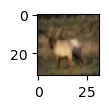

In [16]:
plt.figure(figsize=(.8,.8))
plt.imshow(x_train[3])

In [21]:
y_train[0]

array([6], dtype=uint8)

In [22]:
y_train=y_train.reshape(-1,)

In [47]:
y_test=y_test.reshape(-1,)

In [24]:
y_train[0]

6

In [29]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
x_train=x_train/255

In [33]:
x_test=x_test/255

In [35]:
x_train[0].shape

(32, 32, 3)

In [44]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=x_train[0].shape),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
                        ])

In [45]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [46]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.3871 - loss: 1.6777
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6001 - loss: 1.1381
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6531 - loss: 0.9900
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6841 - loss: 0.9043
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7103 - loss: 0.8338
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7301 - loss: 0.7844
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7458 - loss: 0.7334
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7649 - loss: 0.6832
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7802 - loss: 0.6287
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7886 - loss: 0.6020


In [48]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6911 - loss: 0.9323


[0.9356669783592224, 0.6908000111579895]

In [49]:
y_pred=cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [50]:
y_pred.shape

(10000, 10)

In [53]:
y_pred[:5]

array([[3.8797708e-04, 5.2775824e-05, 1.6658392e-03, 8.2555401e-01,
        5.2369916e-04, 1.5799509e-01, 1.3144750e-02, 3.2737895e-05,
        8.5582280e-05, 5.5757404e-04],
       [1.8267840e-03, 1.1396012e-03, 1.3538579e-05, 1.7627964e-06,
        1.6688674e-08, 2.6774284e-08, 9.0877172e-08, 6.1955058e-10,
        9.9700940e-01, 8.7408716e-06],
       [9.0484872e-02, 7.7567056e-02, 2.3518363e-03, 9.1694128e-03,
        2.0428898e-02, 1.4384427e-03, 3.2510216e-04, 7.2004186e-04,
        7.7424496e-01, 2.3269486e-02],
       [9.3854678e-01, 1.6254831e-02, 1.2406316e-03, 2.0060802e-04,
        6.8937812e-04, 4.3745463e-06, 5.3181491e-05, 1.5310427e-05,
        4.2985182e-02, 9.7033208e-06],
       [3.7530990e-06, 3.0590679e-06, 4.3532373e-03, 2.5209098e-03,
        9.2181516e-01, 5.0417974e-04, 7.0781298e-02, 1.9620238e-06,
        1.4781441e-05, 1.6600109e-06]], dtype=float32)

In [54]:
y_pred[5]

array([7.8838246e-05, 1.1713320e-05, 1.3495900e-02, 4.7713541e-03,
       5.2355672e-03, 8.0555044e-03, 9.6776843e-01, 3.4211858e-04,
       3.7042122e-05, 2.0363260e-04], dtype=float32)

In [55]:
y_test[5]

6

In [56]:
np.argmax(y_pred[5])

6

In [58]:
y_class=[np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 0, 4]

In [59]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)